# Technical test for interview at B-YOUND


This notebook explain the methodology of the B-YOUND technical test.
I did the test on my personal laptop which is an Asus with an intel core i7 7th generation. 
I have 16 Go of RAM and my operating system is Windows 10.

On this laptop, I am using Python 2.7 but I am using Pyhton 3.4 at work

For more information of Pyton libraries, see bellow..

Table of contents :
* Importing libraries for coding
* Importing Data And Outliers detection
* Forcasting values on clean data
    * Statistical way
    * Machine Learning way
    * Find the best algorithm
    * Prediction !!
    * Merge it all together

## Importing libraries for coding

In [1]:
import pandas as pd
import numpy as np
import time

# time series decompose import
import statsmodels.api as sm

#visualisation import
import matplotlib.pyplot as plt

#forecasting import
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fbprophet import Prophet

#delete warning
import warnings
warnings.filterwarnings('ignore')

#ML libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import tree
from sklearn import ensemble

print "pandas version : ", pd.__version__
print "numpy version : ", np.__version__

pandas version :  0.23.4
numpy version :  1.14.3


## 1 / Importing Data And Outliers detection

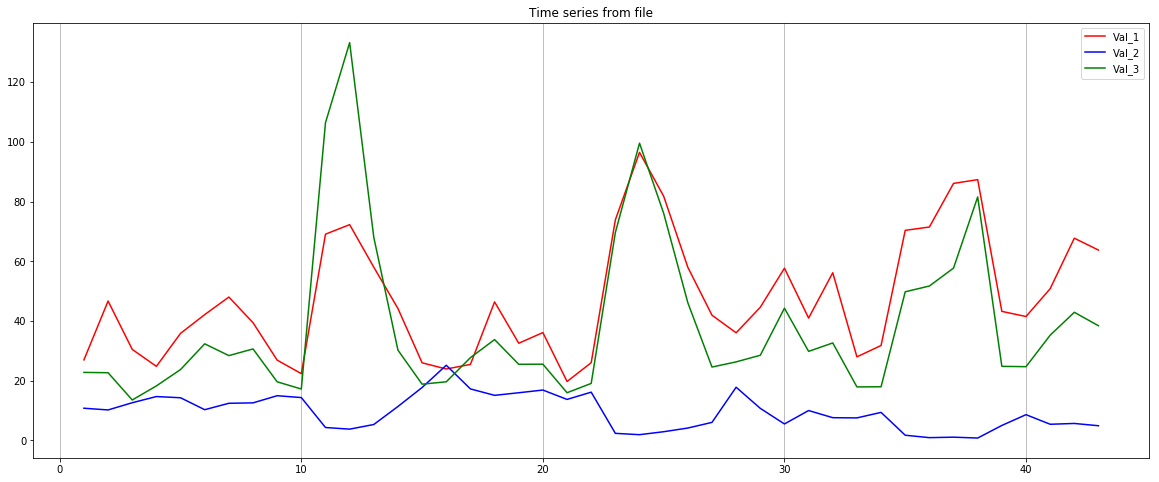

,Val_1,Val_2,Val_3
Index,,,
1,26.950,10.771,22.770
2,46.662,10.195,22.660
3,30.470,12.611,13.530
4,24.794,14.682,18.249
5,35.849,14.277,23.727


In [2]:
#reading file for csv
df_ts_test = pd.read_csv("./byond_ts_test-master/ts_test_43.csv", sep=";", decimal=",", index_col=0)

#ploting data
fig = plt.figure(figsize=(20,8))
plt.plot(df_ts_test.index, df_ts_test.Val_1, "r-")
plt.plot(df_ts_test.index, df_ts_test.Val_2, "b-")
plt.plot(df_ts_test.index, df_ts_test.Val_3, "g-")
plt.title("Time series from file")
plt.legend()
plt.grid(True, axis="x")
plt.show()

df_ts_test.head()

This is my first observations about our times series
* it seems that there are all composed of a trend and a seasonality,
* the period value seems to be 12 samples, 
* it seams that we are in a multiplicative scenario because, we can see that the rise of val_1 is growing proportionally in time.
* It's seems that the Val_2 series has the opposite behavior that val 1 and Val 3 : When Val_2 grow, Val_1 & Val_3 are reducing

We will assume that the seasonal period of our data is 12 so it means that we are looking on monthly records.

In order to detect outliers in our time series, we will decompose them in trend / seasonality / residual using statsmodels method.

Let's decompose them in a multiplicative and additive ways to be sure that we are not missing something.. 

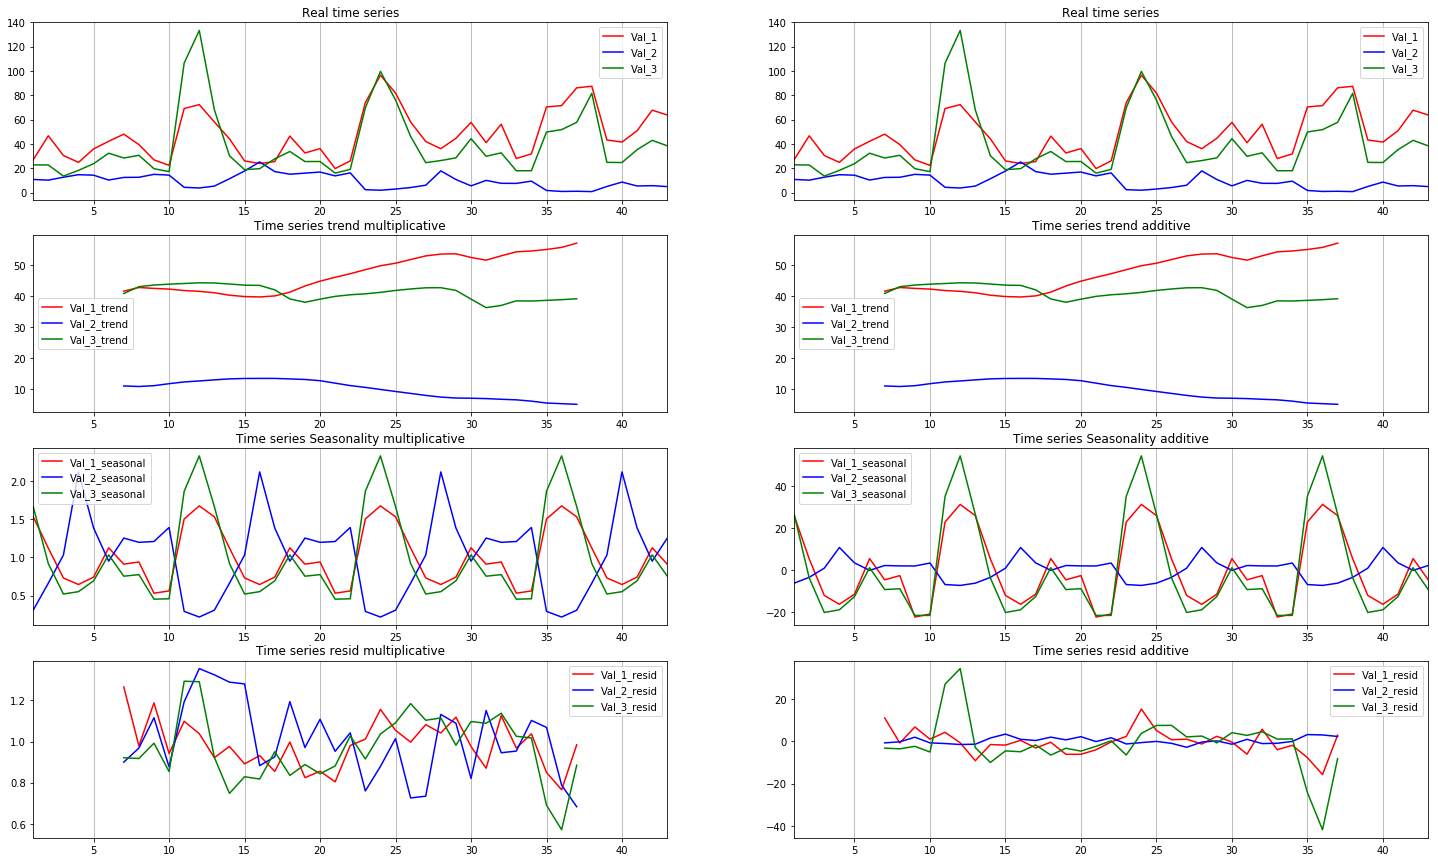

In [3]:
df_test_multi = df_ts_test.copy() 
df_test_add = df_ts_test.copy() 

#decompose all 3 features in Trend, Seasonal and Residual
for col in ["Val_1","Val_2","Val_3"] :
    #multiplicative way
    res_mult = sm.tsa.seasonal_decompose(df_test_multi[col], "multiplicative", freq=12)
    df_test_multi[col+"_trend"] = res_mult.trend
    df_test_multi[col+"_seasonal"] = res_mult.seasonal
    df_test_multi[col+"_resid"] = res_mult.resid
    
    #Addi
    res_add = sm.tsa.seasonal_decompose(df_test_add[col], freq=12)
    df_test_add[col+"_trend"] = res_add.trend
    df_test_add[col+"_seasonal"] = res_add.seasonal
    df_test_add[col+"_resid"] = res_add.resid
    
fig = plt.figure(figsize=(25,15))

date_min = df_test_add.index.min()
date_max = df_test_add.index.max()

#Orginal values
ax = plt.subplot2grid((4, 2), (0, 0))
plt.plot(df_test_multi.index, df_test_multi.Val_1, "r-")
plt.plot(df_test_multi.index, df_test_multi.Val_2, "b-")
plt.plot(df_test_multi.index, df_test_multi.Val_3, "g-")
plt.title("Real time series")
plt.xlim(date_min, date_max)
plt.legend()
plt.grid(True, axis="x")

ax = plt.subplot2grid((4, 2), (0, 1))
plt.plot(df_test_add.index, df_test_add.Val_1, "r-")
plt.plot(df_test_add.index, df_test_add.Val_2, "b-")
plt.plot(df_test_add.index, df_test_add.Val_3, "g-")
plt.title("Real time series")
plt.xlim(date_min, date_max)
plt.legend()
plt.grid(True, axis="x")

#Trend series
ax = plt.subplot2grid((4, 2), (1, 0))
plt.plot(df_test_multi.index, df_test_multi.Val_1_trend, "r-")
plt.plot(df_test_multi.index, df_test_multi.Val_2_trend, "b-")
plt.plot(df_test_multi.index, df_test_multi.Val_3_trend, "g-")
plt.title("Time series trend multiplicative")
plt.xlim(date_min, date_max)
plt.legend()
plt.grid(True, axis="x")

ax = plt.subplot2grid((4, 2), (1, 1))
plt.plot(df_test_add.index, df_test_add.Val_1_trend, "r-")
plt.plot(df_test_add.index, df_test_add.Val_2_trend, "b-")
plt.plot(df_test_add.index, df_test_add.Val_3_trend, "g-")
plt.title("Time series trend additive")
plt.xlim(date_min, date_max)
plt.legend()
plt.grid(True, axis="x")

#Seasonality
ax = plt.subplot2grid((4, 2), (2, 0))
plt.plot(df_test_multi.index, df_test_multi.Val_1_seasonal, "r-")
plt.plot(df_test_multi.index, df_test_multi.Val_2_seasonal, "b-")
plt.plot(df_test_multi.index, df_test_multi.Val_3_seasonal, "g-")
plt.title("Time series Seasonality multiplicative")
plt.xlim(date_min, date_max)
plt.legend()
plt.grid(True, axis="x")

ax = plt.subplot2grid((4, 2), (2, 1))
plt.plot(df_test_add.index, df_test_add.Val_1_seasonal, "r-")
plt.plot(df_test_add.index, df_test_add.Val_2_seasonal, "b-")
plt.plot(df_test_add.index, df_test_add.Val_3_seasonal, "g-")
plt.title("Time series Seasonality additive")
plt.xlim(date_min, date_max)
plt.legend()
plt.grid(True, axis="x")

#Residual
ax = plt.subplot2grid((4, 2), (3, 0))
plt.plot(df_test_multi.index, df_test_multi.Val_1_resid, "r-")
plt.plot(df_test_multi.index, df_test_multi.Val_2_resid, "b-")
plt.plot(df_test_multi.index, df_test_multi.Val_3_resid, "g-")
plt.title("Time series resid multiplicative")
plt.xlim(date_min,date_max)
plt.legend()
plt.grid(True, axis="x")

ax = plt.subplot2grid((4, 2), (3, 1))
plt.plot(df_test_add.index, df_test_add.Val_1_resid, "r-")
plt.plot(df_test_add.index, df_test_add.Val_2_resid, "b-")
plt.plot(df_test_add.index, df_test_add.Val_3_resid, "g-")
plt.title("Time series resid additive")
plt.xlim(date_min,date_max)
plt.legend()
plt.grid(True, axis="x")

plt.show()

This decomposition tells us 2 main thing :
* It is more fare to decompose with an additional behavior that a multiplicative one. In fact, the residual is quite noisy in the multiplicative one.
* thanks to the multiplicative decomposition, we car clearly see that the seasonality of second value in the inverse of the first one

For detecting Outliers, we can use 2 statistics methods :
* IQR test, which is a characteristic of boxplot chart
* Z score, is mapping the data into a distribution whose mean is defined as 0 and whose standard deviation is defined as 1.

For our test, we will use IQR test on residual series. When we will find an outliers, we replace the reside value by 0.

nb outliers :
val_1 :  2
val_2 :  0
val_3 :  4


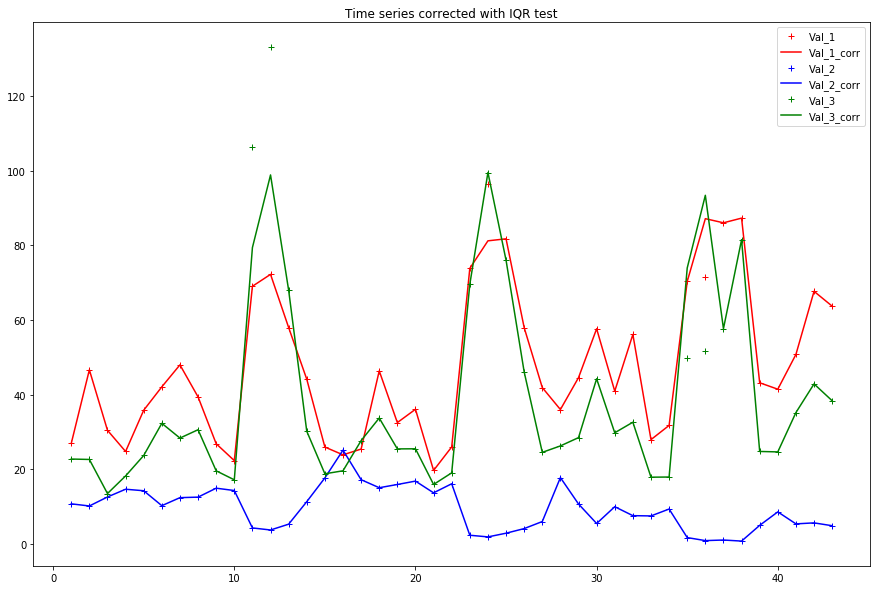

In [4]:
#IQR test
#IQR = q3 - q1
#lower_bound = q1 -(1.5 * iqr) 
#upper_bound = q3 +(1.5 * iqr)
df_test_IQR = df_test_add.copy()
df_quartile = df_test_IQR.quantile([.25, .75])

for col in ["Val_1_resid","Val_2_resid","Val_3_resid"] :
    iqr = df_quartile.loc[0.75, col] -  df_quartile.loc[0.25, col]
    df_test_IQR[col+"_test"] = (df_test_IQR[col] < df_quartile.loc[0.25, col] - (1.5 * iqr)) | (df_test_IQR[col] > df_quartile.loc[0.75, col] + (1.5 * iqr))
    
print "nb outliers :"
print "val_1 : ", df_test_IQR["Val_1_resid_test"].sum()
print "val_2 : ", df_test_IQR["Val_2_resid_test"].sum()
print "val_3 : ", df_test_IQR["Val_3_resid_test"].sum()

df_test_IQR["Val_1_resid"] = np.where(df_test_IQR["Val_1_resid_test"], 0, df_test_IQR["Val_1_resid"])
df_test_IQR["Val_1_corr"] = np.where(df_test_IQR["Val_1_resid"].isnull(), df_test_IQR["Val_1"],
                                     df_test_IQR["Val_1_trend"] + df_test_IQR["Val_1_seasonal"] + df_test_IQR["Val_1_resid"])

df_test_IQR["Val_2_resid"] = np.where(df_test_IQR["Val_2_resid_test"], 0, df_test_IQR["Val_2_resid"])
df_test_IQR["Val_2_corr"] = np.where(df_test_IQR["Val_2_resid"].isnull(), df_test_IQR["Val_2"],
                                     df_test_IQR["Val_2_trend"] + df_test_IQR["Val_2_seasonal"] + df_test_IQR["Val_2_resid"])

df_test_IQR["Val_3_resid"] = np.where(df_test_IQR["Val_3_resid_test"], 0, df_test_IQR["Val_3_resid"])
df_test_IQR["Val_3_corr"] = np.where(df_test_IQR["Val_3_resid"].isnull(), df_test_IQR["Val_3"],
                                     df_test_IQR["Val_3_trend"] + df_test_IQR["Val_3_seasonal"] + df_test_IQR["Val_3_resid"])

fig = plt.figure(figsize=(15,10))
plt.plot(df_test_IQR.index, df_test_IQR.Val_1, "r+")
plt.plot(df_test_IQR.index, df_test_IQR.Val_1_corr, "r-")
plt.plot(df_test_IQR.index, df_test_IQR.Val_2, "b+")
plt.plot(df_test_IQR.index, df_test_IQR.Val_2_corr, "b-")
plt.plot(df_test_IQR.index, df_test_IQR.Val_3, "g+")
plt.plot(df_test_IQR.index, df_test_IQR.Val_3_corr, "g-")
plt.title("Time series corrected with IQR test")
plt.legend()
plt.show()

## 2 / Forecasting values on clean data

Now that we have our data clean, we can work on forecasting technique.

For measuring our forecast error, you will use MAPE error : $MAPE = \frac{1}{n} \sum \frac{|e_{t}|}{d_{t}}$  
&Longrightarrow; By the fact that each error are devised by the actual value, you will give a lot's of importance of high errors during low-demand periods. If we decide to use this KPI, we must keep in mind that we will be undershooting your demand.

I usually use Mean Absolute Error or Root Mean Square Error for computing my error. Because it will optimize your forecast around median value for the MAE and the mean value for RMSE.

In order to cross-validate our model, we will split our dataset in a train & test set :
* Train set will be 31 first samples
* Test set will be 12 last samples

We also are going to measure time that models took to train and predict in order to choose the appropriate one.
In a pragmatic way, we want the most accurate model that took the minimum time possible.

In [5]:
df_corrected_values = df_test_IQR[["Val_1_corr","Val_2_corr","Val_3_corr"]].copy()

n_test = 12
n_train_test_split = len(df_corrected_values) - n_test
print n_train_test_split

train_df = df_corrected_values[df_corrected_values.index <= n_train_test_split].copy()
test_df = df_corrected_values[df_corrected_values.index > n_train_test_split].copy()

df_forcasting_result = pd.DataFrame()

df_corrected_values.tail()

31


,Val_1_corr,Val_2_corr,Val_3_corr
Index,,,
39,43.208,5.004,24.805
40,41.481,8.615,24.684
41,50.798,5.401,35.222
42,67.705,5.670,42.900
43,63.734,4.906,38.390


In [6]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### a / Statistical way

The first model we are going to use is exponential smoothing.

We are not going to explain how it's works, clever persons already did it.
What we need to know is that ets library will calculate automatically 3 parameters :
* Alpha : forgiveness factor,
* Beta : trend factor,
* Gamma : seasonality factor 

Now, we know that, we are going to build 3 different models for our 3 features.

Val_1_corr  MAPE for Exponential smoothing : 15.440368499267358
Val_2_corr  MAPE for Exponential smoothing : 100.32289684220011
Val_3_corr  MAPE for Exponential smoothing : 19.270523354515788


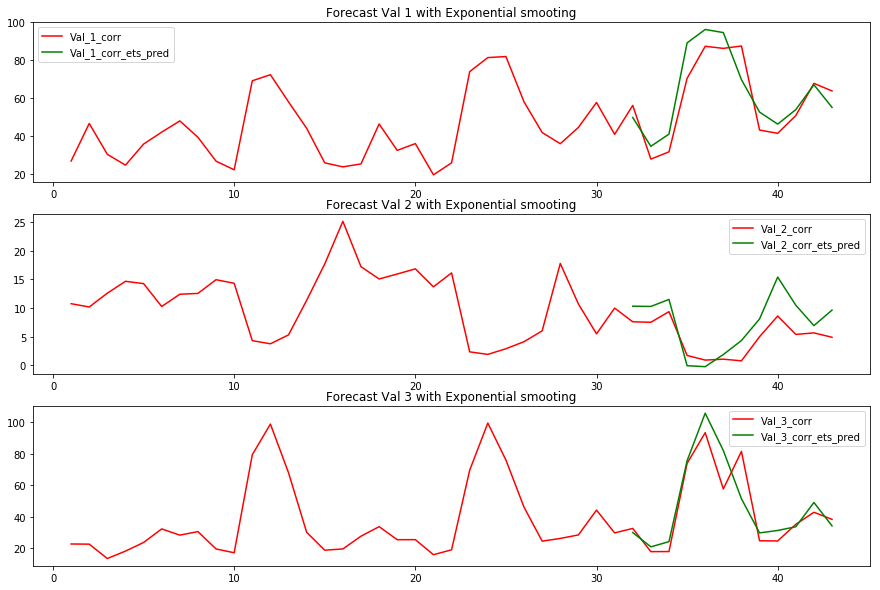

,Algorithm,Features,MAPE,fit_time,predict_time
0,Ets_add,Val_1_corr,15.440368,0.592,0.003
1,Ets_add,Val_2_corr,100.322897,0.984,0.002
2,Ets_add,Val_3_corr,19.270523,0.558,0.001


In [7]:
### Expoential smoothing
test_df_result = test_df.copy()
ets_res = []
# For every features
for col_name in ["Val_1_corr", "Val_2_corr","Val_3_corr"] :
    train = train_df[col_name].copy()
    test = test_df[col_name].copy()
    
    #fit ets model
    fit_ExpSmoo = time.time()
    ets_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).fit()
    end_fit_ExpSmoo = time.time()
    
    #predict values
    predict_ExpSmoo = time.time()
    pred = ets_model.forecast(n_test)
    end_predict_ExpSmoo = time.time()
    
    #create a dataframe with forasted values
    df_pred = pd.DataFrame(pred, columns=[col_name + "_ets_pred"])
    df_pred["index"] = df_pred.index + 1
    df_pred = df_pred.set_index("index")

    test_df_result = pd.merge(test_df_result, df_pred, left_index=True, right_index=True, how="outer")
    
    # compute MAPE error
    mape_error = mean_absolute_percentage_error(test_df_result[col_name], test_df_result[col_name+"_ets_pred"])
    print col_name, " MAPE for Exponential smoothing :", mape_error
    
    #Add this model to result dataframe
    ets_res.append(["Ets_add",col_name, mape_error, end_fit_ExpSmoo - fit_ExpSmoo, end_predict_ExpSmoo - predict_ExpSmoo])
    
df_ets_result = pd.DataFrame(ets_res, columns=["Algorithm", "Features", "MAPE", "fit_time", "predict_time"])
df_forcasting_result = pd.concat([df_forcasting_result, df_ets_result])

#plot forecast
fig = plt.figure(figsize=(15,10))

ax = plt.subplot2grid((3, 1), (0, 0))
plt.plot(df_corrected_values.index, df_corrected_values.Val_1_corr, "r-")
plt.plot(test_df_result.index, test_df_result.Val_1_corr_ets_pred, "g-")
plt.title("Forecast Val 1 with Exponential smooting")
plt.legend()

ax = plt.subplot2grid((3, 1), (1, 0))
plt.plot(df_corrected_values.index, df_corrected_values.Val_2_corr, "r-")
plt.plot(test_df_result.index, test_df_result.Val_2_corr_ets_pred, "g-")
plt.title("Forecast Val 2 with Exponential smooting")
plt.legend()

ax = plt.subplot2grid((3, 1), (2, 0))
plt.plot(df_corrected_values.index, df_corrected_values.Val_3_corr, "r-")
plt.plot(test_df_result.index, test_df_result.Val_3_corr_ets_pred, "g-")
plt.title("Forecast Val 3 with Exponential smooting")
plt.legend()
plt.show()

df_forcasting_result.head()

The second model we are going to use is the Facebook algorithm for forecasting.

They open sourced their model which is also a statistical model. If you want to improve your knowledge about this algorithm, I invite you to read the paper they did about it : https://peerj.com/preprints/3190.pdf

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


MAPE for fbprophete : 12.64850935987368


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 23.0.


MAPE for fbprophete : 120.31198696958323
MAPE for fbprophete : 22.964546292410382


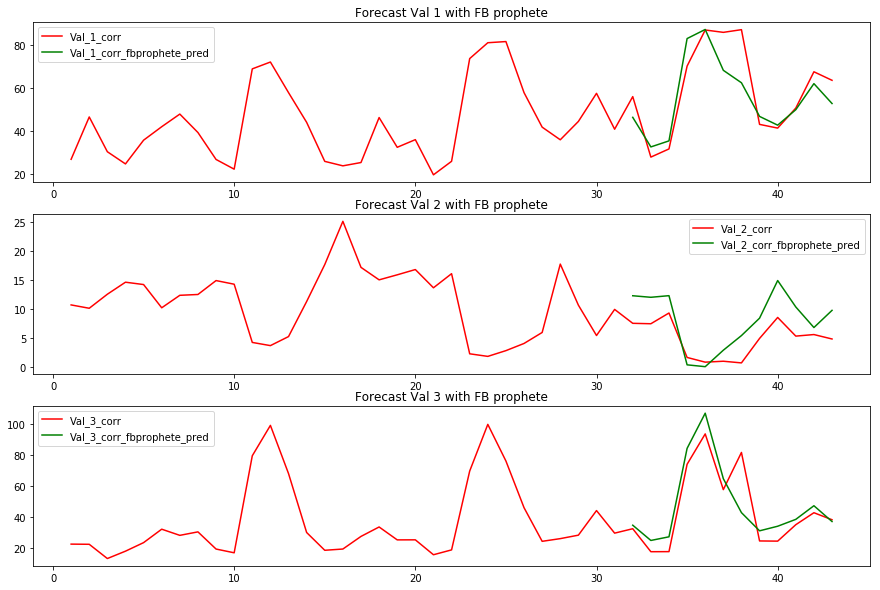

,Algorithm,Features,MAPE,fit_time,predict_time
0,Ets_add,Val_1_corr,15.440368,0.592,0.003
1,Ets_add,Val_2_corr,100.322897,0.984,0.002
2,Ets_add,Val_3_corr,19.270523,0.558,0.001
0,fbprophete_add,Val_1_corr,12.648509,0.137,3.060
1,fbprophete_add,Val_2_corr,120.311987,0.176,2.908
2,fbprophete_add,Val_3_corr,22.964546,0.140,2.856


In [8]:
#FB prophete librarie for forecasting
fbprophete_res = []
# for all corrected values
for col_name in ["Val_1_corr", "Val_2_corr","Val_3_corr"] :
    #we need to rename our column to use fbprophete
    train = train_df[[col_name]].reset_index().rename(index=str, columns={"Index":"ds",col_name:"y"})
    test = test_df[[col_name]].reset_index()
    
    #We are creating a date with is also a requirement for fbprophete
    train["month"] = ((train["ds"] - 1) % 12 + 1).astype(str)
    train["year"] = (np.floor((train["ds"] - 1) / 12).astype(int) + 2015).astype(str)
    train["ds"] = train["year"] + "-" + train["month"] + "-01"
    train = train.drop(["month","year"], axis=1)

    #fit the model
    fit_prophet=time.time()
    m = Prophet(seasonality_mode='additive').fit(train)
    end_fit_prophet=time.time()
    
    #predict model
    predict_prophet=time.time()
    future = m.make_future_dataframe(periods=n_test, freq='M')
    forecast = m.predict(future).reset_index()
    end_predict_prophet=time.time()
    
    #somes transformation to merge wwith testing result
    forecast["index"] = forecast.index + 1
    forecast.set_index("index", inplace=True)
    forecast = forecast.rename(columns={"yhat":col_name+"_fbprophete_pred"})

    test_df_result = pd.merge(test_df_result, forecast[[col_name+"_fbprophete_pred"]], left_index=True, right_index=True, how="left")
    
    #compute MAPE
    mape_error = mean_absolute_percentage_error(test_df_result[col_name], test_df_result[col_name+"_fbprophete_pred"])
    print "MAPE for fbprophete :", mape_error
    fbprophete_res.append(["fbprophete_add",col_name, mape_error, end_fit_prophet - fit_prophet, end_predict_prophet - predict_prophet])

df_fbprophete_result = pd.DataFrame(fbprophete_res, columns=["Algorithm", "Features", "MAPE", "fit_time", "predict_time"])
df_forcasting_result = pd.concat([df_forcasting_result, df_fbprophete_result])

# plot forecast
fig = plt.figure(figsize=(15,10))

ax = plt.subplot2grid((3, 1), (0, 0))
plt.plot(df_corrected_values.index, df_corrected_values.Val_1_corr, "r-")
plt.plot(test_df_result.index, test_df_result.Val_1_corr_fbprophete_pred, "g-")
plt.title("Forecast Val 1 with FB prophete")
plt.legend()

ax = plt.subplot2grid((3, 1), (1, 0))
plt.plot(df_corrected_values.index, df_corrected_values.Val_2_corr, "r-")
plt.plot(test_df_result.index, test_df_result.Val_2_corr_fbprophete_pred, "g-")
plt.title("Forecast Val 2 with FB prophete")
plt.legend()

ax = plt.subplot2grid((3, 1), (2, 0))
plt.plot(df_corrected_values.index, df_corrected_values.Val_3_corr, "r-")
plt.plot(test_df_result.index, test_df_result.Val_3_corr_fbprophete_pred, "g-")
plt.title("Forecast Val 3 with FB prophete")
plt.legend()
plt.show()

df_forcasting_result

### b / Machine Learning way

Statistical model are cool, but what is fun in data science it's using Machine Learning.

So we are going to work on our data in order to pass them from a time series problematic to a machine learning one.

To do so, we are going to work on 2 parts :
* First one, we are going to shift previous values in order to use them for predicting the forecast
* Then, we will create times features, in order to give to the algorithm some information's about time of samples.

For our experiment, we are going to create a model that is going to predict the value from 12 older values and the year and month values.

In [9]:
"""
    function that create a dataframe with shifted values
"""
def getShift(df,col,n):
    df_with_shift = df.copy()
    for i in range(1,n + 1):
        df_with_shift[str(col) + "_(t-" + str(i) + ")"] = df_with_shift[col].shift(i)

    return df_with_shift

#stack data for simplify data transformation
df_corrected_values_for_ML = df_corrected_values.stack().reset_index().rename(columns={"level_0":"Index", "level_1":"Features", 0:"Value"})

n_shift = 12
list_df_res = []
#lets compute shif for all values.
for col_name in df_corrected_values_for_ML.Features.unique():
    df_temp = df_corrected_values_for_ML[df_corrected_values_for_ML["Features"] == col_name]
    df_temp = getShift(df_temp, "Value", n_shift)
    list_df_res.append(df_temp)
df_corrected_values_for_ML = pd.concat(list_df_res)
df_corrected_values_for_ML = df_corrected_values_for_ML.dropna()

#compute year and month description
df_corrected_values_for_ML["month"] = (df_corrected_values_for_ML["Index"] - 1) % 12 + 1
df_corrected_values_for_ML["year"] = np.floor((df_corrected_values_for_ML["Index"]-1) / 12).astype(int)

#split it in train and test like before
df_train_for_ML = df_corrected_values_for_ML[df_corrected_values_for_ML.Index <= n_train_test_split]
df_test_for_ML = df_corrected_values_for_ML[df_corrected_values_for_ML.Index > n_train_test_split]

print "final learning length for training" 
print df_train_for_ML.groupby(["Features"], as_index=False).agg({"Value":"count"})
print "final learning length for testing" 
print df_test_for_ML.groupby(["Features"], as_index=False).agg({"Value":"count"})

df_corrected_values_for_ML.head()

final learning length for training
     Features  Value
0  Val_1_corr     19
1  Val_2_corr     19
2  Val_3_corr     19
final learning length for testing
     Features  Value
0  Val_1_corr     12
1  Val_2_corr     12
2  Val_3_corr     12


,Index,Features,Value,Value_(t-1),Value_(t-2),Value_(t-3),Value_(t-4),Value_(t-5),Value_(t-6),Value_(t-7),Value_(t-8),Value_(t-9),Value_(t-10),Value_(t-11),Value_(t-12),month,year
36,13,Val_1_corr,58.003,72.248,69.058,22.352,26.873,39.413,48.004,42.119,35.849,24.794,30.470,46.662,26.950,1,1
39,14,Val_1_corr,44.154,58.003,72.248,69.058,22.352,26.873,39.413,48.004,42.119,35.849,24.794,30.470,46.662,2,1
42,15,Val_1_corr,25.982,44.154,58.003,72.248,69.058,22.352,26.873,39.413,48.004,42.119,35.849,24.794,30.470,3,1
45,16,Val_1_corr,23.903,25.982,44.154,58.003,72.248,69.058,22.352,26.873,39.413,48.004,42.119,35.849,24.794,4,1
48,17,Val_1_corr,25.443,23.903,25.982,44.154,58.003,72.248,69.058,22.352,26.873,39.413,48.004,42.119,35.849,5,1


Now that we have our data, we are going to create a Ml model for doing the prediction.

We choose to use one model per features to forecast wich mean that we wil use the forecast we did at time t for forecasting time t+1

We will try several algorithm of regression in order to picks after modelisation the more accurate one.

In [12]:
collist = [x for x in df_train_for_ML.columns if x not in ("Index", "Features", "Value")]

print collist

df_test_for_ML["Value_real"] = df_test_for_ML["Value"]
ML_res = []

# list of algorithms that we will try
list_algo = ["RF","DecisionTree_5","DecisionTree_10","DecisionTree_20","svm_linear","svm_sigmoid","xgboost_5"]

for algo in list_algo :
    print(algo)
    #choosing the algorithm
    if algo == "RF" :
        reg = RandomForestRegressor(n_estimators=300)
    elif algo == "DecisionTree" :
        depth = int(algo.split("_")[1])
        reg= tree.DecisionTreeRegressor(max_depth=depth)
    elif algo[:3] == "svm" :
        kernel_tricks = algo.split("_")[1]
        reg = svm.SVR(kernel=kernel_tricks)
    elif algo == "xgboost": 
        depth = algo.split("_")[1]
        params = {'n_estimators': 300, 'max_depth': depth, 'min_samples_split': 2,
                  'learning_rate': 0.5, 'loss': 'ls'}
        reg = ensemble.GradientBoostingRegressor(**params)

    #for evry feature, let's fit and predict
    for col_name in ["Val_1_corr", "Val_2_corr", "Val_3_corr"]:
        df_train_temp = df_train_for_ML[df_train_for_ML["Features"] == col_name].copy()
        df_test_temp = df_test_for_ML[df_test_for_ML["Features"] == col_name].copy()
        df_test_temp.set_index("Index", inplace=True)

        X_train = df_train_temp[collist].values
        y_train = df_train_temp["Value"].values
        #fit
        fit_ML=time.time()
        reg.fit(X_train, y_train)
        end_fit_ML=time.time()

        #predict
        predict_ML = time.time()
        for i_pred in range(n_train_test_split + 1, n_train_test_split + 1 + n_test) :
            #get previous values
            tmp = [df_test_temp.loc[i_pred][collist].values]
            #make the prediction and save it
            prediction = reg.predict(tmp)[0]
            df_test_temp.loc[i_pred, "Value"] = prediction
            #for each row, switch this new values for more prediction
            for i_shift in range(1, n_shift + 1) :
                if i_pred + i_shift <= df_test_temp.index.max() : 
                    temp_i_pred = i_pred + i_shift
                    df_test_temp.loc[temp_i_pred, "Value_(t-" + str(i_shift) + ")"] = prediction
        end_predict_ML = time.time()
        
        #compute MAPE error
        mape_error = mean_absolute_percentage_error(df_test_temp["Value_real"], df_test_temp["Value"])
        ML_res.append(["ml_"+str(n_shift)+"_"+algo,col_name, mape_error, end_fit_ML - fit_ML, end_predict_ML - predict_ML])

df_ML_res = pd.DataFrame(ML_res, columns=["Algorithm", "Features", "MAPE", "fit_time", "predict_time"])
df_forcasting_result = pd.concat([df_forcasting_result, df_ML_res])
df_forcasting_result.head()

['Value_(t-1)', 'Value_(t-2)', 'Value_(t-3)', 'Value_(t-4)', 'Value_(t-5)', 'Value_(t-6)', 'Value_(t-7)', 'Value_(t-8)', 'Value_(t-9)', 'Value_(t-10)', 'Value_(t-11)', 'Value_(t-12)', 'month', 'year']
RF
DecisionTree_5
DecisionTree_10
DecisionTree_20
svm_linear
svm_sigmoid
xgboost_5


,Algorithm,Features,MAPE,fit_time,predict_time
0,Ets_add,Val_1_corr,15.440368,0.592,0.003
1,Ets_add,Val_2_corr,100.322897,0.984,0.002
2,Ets_add,Val_3_corr,19.270523,0.558,0.001
0,fbprophete_add,Val_1_corr,12.648509,0.137,3.060
1,fbprophete_add,Val_2_corr,120.311987,0.176,2.908


### c / Find the best algorithm

Now that we test all of our model, we need to choose the best one.
Normally, we select the algorithm that :
* as the best accuracy
* take the less of time

In our test, we don't have much data, so training and testing time will are low of every models.

So we are going to plot 3 best algorithm for each features.

In [13]:
print "Val_1_corr"
print df_forcasting_result[df_forcasting_result["Features"] == "Val_1_corr"].sort_values("MAPE").iloc[0:3][["Algorithm","MAPE"]]
print "Val_2_corr"
print df_forcasting_result[df_forcasting_result["Features"] == "Val_2_corr"].sort_values("MAPE").iloc[0:3][["Algorithm","MAPE"]]
print "Val_3_corr"
print df_forcasting_result[df_forcasting_result["Features"] == "Val_3_corr"].sort_values("MAPE").iloc[0:3][["Algorithm","MAPE"]]

Val_1_corr
           Algorithm       MAPE
0     fbprophete_add  12.648509
0            Ets_add  15.440368
12  ml_12_svm_linear  19.036372
Val_2_corr
           Algorithm        MAPE
1            Ets_add  100.322897
1     fbprophete_add  120.311987
13  ml_12_svm_linear  245.168183
Val_3_corr
                Algorithm       MAPE
2                ml_12_RF  18.363370
11  ml_12_DecisionTree_20  18.964007
8   ml_12_DecisionTree_10  19.246986


* Fb Prophet algorithm seems to be the more accurate for the first feature
* Exponential smoothing algorithm seems to be the more accurate for the second feature
* Random Forest with a shift at 12 seems to be the more accurate for the third feature

### d / Prediction !!

Lets take those algorithms, fit them on all data we have to predict next 4 samples ! 

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Val_1
Index,
1,50.456608
2,46.241184
3,22.973692
4,19.293280
5,27.030765


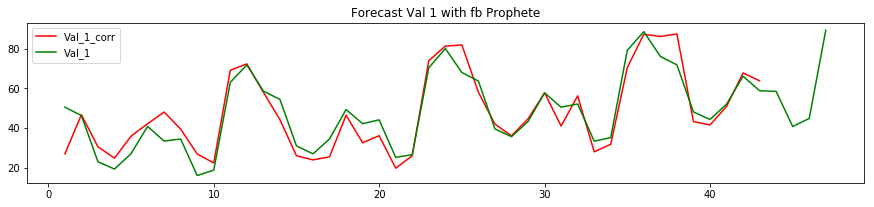

In [14]:
#Val_1_corr
#fbprophete_add
df_train_all_val_1 = df_corrected_values[["Val_1_corr"]].reset_index().rename(index=str, columns={"Index":"ds","Val_1_corr":"y"})

df_train_all_val_1["month"] = ((df_train_all_val_1["ds"] - 1) % 12 + 1).astype(str)
df_train_all_val_1["year"] = (np.floor((df_train_all_val_1["ds"]-1) / 12).astype(int) + 2015).astype(str)

df_train_all_val_1["ds"] = df_train_all_val_1["year"] + "-" + df_train_all_val_1["month"] + "-01"
df_train_all_val_1 = df_train_all_val_1.drop(["month","year"], axis=1)

# fit and predict
m = Prophet(seasonality_mode='additive').fit(df_train_all_val_1)
future = m.make_future_dataframe(periods=4, freq='M')
fct_val_1 = m.predict(future).reset_index()

#transform result
fct_val_1["Index"] = fct_val_1.index + 1
fct_val_1.set_index("Index", inplace=True)
fct_val_1 = fct_val_1.rename(columns={"yhat":"Val_1"})

#plot result
fig = plt.figure(figsize=(15,10))
ax = plt.subplot2grid((3, 1), (0, 0))
plt.plot(df_corrected_values.index, df_corrected_values.Val_1_corr, "r-")
plt.plot(fct_val_1.index, fct_val_1.Val_1, "g-")
plt.title("Forecast Val 1 with fb Prophete")
plt.legend()

fct_val_1[["Val_1"]].head()

,Val_2
Index,
44,5.385308
45,5.360759
46,6.827101
47,-3.411943


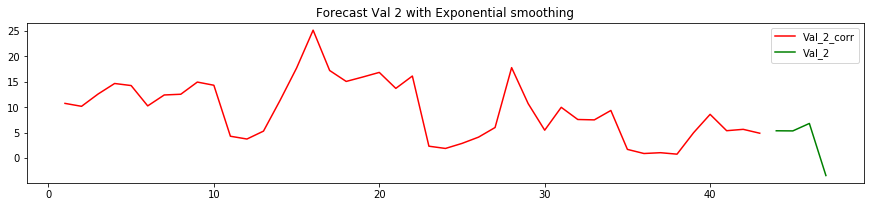

In [15]:
#Val_2_corr
#ets_add
df_corrected_all_val_2 = df_corrected_values["Val_2_corr"].copy()

#fit and predict
ets_model = ExponentialSmoothing(df_corrected_all_val_2, trend="add",seasonal="add", seasonal_periods=12).fit()
pred_val_2 = ets_model.forecast(4)

#transform result
fct_val_2 = pd.DataFrame(pred_val_2, columns=["Val_2"])
fct_val_2["Index"] = fct_val_2.index + 1
fct_val_2 = fct_val_2.set_index("Index")

#plot the forecast
fig = plt.figure(figsize=(15,10))
ax = plt.subplot2grid((3, 1), (0, 0))
plt.plot(df_corrected_values.index, df_corrected_values.Val_2_corr, "r-")
plt.plot(fct_val_2.index, fct_val_2.Val_2, "g-")
plt.title("Forecast Val 2 with Exponential smoothing")
plt.legend()

fct_val_2[["Val_2"]].tail()

,Val_3
Index,
44,36.377550
45,20.080463
46,20.120201
47,73.561481


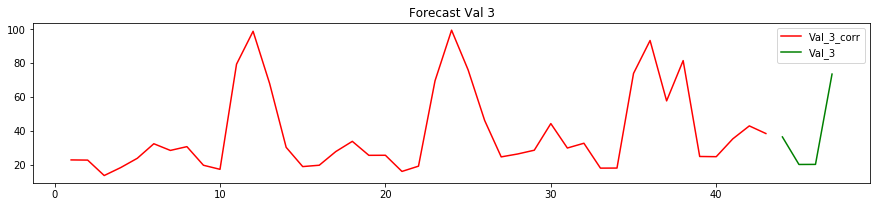

In [16]:
#Val_3
#ml_12_RF  
#Some data transformation
df_corrected_all_val_3 = df_corrected_values_for_ML[df_corrected_values_for_ML["Features"] == "Val_3_corr"].copy()
df_corrected_all_val_3.set_index("Index", inplace=True)
collist = [x for x in df_train_for_ML.columns if x not in ("Index", "Features", "Value")]

X_train = df_corrected_all_val_3[collist].values
y_train = df_corrected_all_val_3["Value"].values

#fit with all data
reg = RandomForestRegressor(n_estimators=300)
reg.fit(X_train, y_train)

#predict 
last_index = df_corrected_all_val_3.index.max()
last_prediction = df_corrected_all_val_3.loc[last_index][["Value"] + collist].values
res_prediction = []
for i in range(last_index + 1, last_index + 5) :
    tmp = last_prediction
    tmp[-1] = (i - 1) % 12 + 1 #month
    tmp[-2] = np.floor((i - 1) / 12).astype(int) #Year
    tmp[1:-2] = tmp[:-3] # moving all shift
    prediction = reg.predict([tmp[1:]])[0] #predict
    tmp[0] = prediction
    res_prediction.append([i, prediction])
    
fct_val_3 = pd.DataFrame(res_prediction, columns=["Index", "Val_3"])
fct_val_3.set_index("Index", inplace=True)

# plot result
fig = plt.figure(figsize=(15,10))
ax = plt.subplot2grid((3, 1), (0, 0))
plt.plot(df_corrected_values.index, df_corrected_values.Val_3_corr, "r-")
plt.plot(fct_val_3.index, fct_val_3.Val_3, "g-")
plt.title("Forecast Val 3")
plt.legend()

fct_val_3

### e / Merge it all together

Now that we did our forecast for our 3 values, with merge it together in order to create our csv file

In [17]:
# All together
df_res = pd.merge(fct_val_1[["Val_1"]], fct_val_2[["Val_2"]], left_index=True, right_index=True, how="inner")
df_res = pd.merge(df_res, fct_val_3[["Val_3"]], left_index=True, right_index=True, how="inner")

df_res.reset_index(inplace=True)

df_res.to_csv("./Forecasting_Result_ArnaudHUREL.csv", sep=";", decimal=",", index=False)
df_res

,Index,Val_1,Val_2,Val_3
0,44,58.390089,5.385308,36.377550
1,45,40.712272,5.360759,20.080463
2,46,44.789844,6.827101,20.120201
3,47,89.227748,-3.411943,73.561481


Thank's for reading me, I hope my results will be accurate ! 

Arnaud HUREL